# Jordskjelvplotting

Her skal me plotta litt jordskjelv

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
skjelv = pd.read_csv("jordskjelv120922.csv")

In [9]:
skjelv.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-09-12T08:14:40.075Z,6.1766,127.5713,10.000,5.6,mww,126.0,45.0,2.169,0.64,...,2022-09-12T10:18:04.862Z,"155 km E of Pondaguitan, Philippines",earthquake,4.57,1.811,0.098,10.0,reviewed,us,us
1,2022-09-11T09:06:51.111Z,-20.9751,-178.9445,629.934,5.5,mb,129.0,19.0,3.499,0.74,...,2022-09-12T09:09:54.327Z,Fiji region,earthquake,9.92,5.850,0.023,638.0,reviewed,us,us
2,2022-09-10T23:46:57.827Z,-6.2557,146.4692,90.013,7.6,mww,121.0,18.0,3.203,0.79,...,2022-09-12T09:56:17.727Z,"66 km E of Kainantu, Papua New Guinea",earthquake,5.73,3.200,0.037,70.0,reviewed,us,us
3,2022-09-10T23:24:00.731Z,-1.2028,98.6188,10.000,5.7,mb,114.0,43.0,2.700,1.07,...,2022-09-11T23:27:10.229Z,"179 km WSW of Pariaman, Indonesia",earthquake,7.09,1.823,0.042,198.0,reviewed,us,us
4,2022-09-10T23:10:44.391Z,-1.1241,98.6239,20.000,6.0,mww,110.0,34.0,2.630,0.95,...,2022-09-11T23:24:02.608Z,"175 km WSW of Pariaman, Indonesia",earthquake,6.82,1.818,0.089,12.0,reviewed,us,us


In [5]:
skjelv.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,20000.000000,20000.000000,20000.000000,20000.000000,7204.000000,9818.000000,4160.000000,19753.000000,3704.000000,7054.000000,2870.000000,4906.000000
mean,-0.288804,33.521782,70.540792,5.872598,271.579262,43.488257,4.354968,1.003689,7.081816,4.054779,0.059454,48.378108
std,30.040841,126.716191,127.504116,0.419776,161.020718,29.029916,5.487181,0.200203,2.322105,8.000387,0.032322,61.945916
min,-77.080000,-179.997000,-3.000000,5.500000,0.000000,8.000000,0.008000,0.040000,0.085000,0.000000,0.000000,0.000000
25%,-20.416000,-82.526750,10.000000,5.600000,142.000000,24.000000,1.182500,0.890000,5.800000,1.800000,0.046000,18.000000
50%,-4.512500,96.661000,32.000000,5.700000,249.000000,36.000000,2.547000,1.000000,7.100000,2.300000,0.055000,32.000000
75%,22.225050,143.582925,50.400000,6.000000,378.000000,54.000000,5.168500,1.110000,8.500000,4.400000,0.068000,56.000000
max,86.922900,179.998100,700.000000,9.100000,934.000000,313.000000,39.730000,2.820000,15.800000,569.200000,0.700000,941.000000


In [7]:
skjelv.shape

(20000, 22)

In [10]:
skjelv.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

## Sortere i tabellen

In [11]:
skjelv = skjelv[skjelv["type"] == "earthquake"]
skjelv.shape

(19880, 22)

In [12]:
skjelv = skjelv[["time", "latitude", "longitude", "depth", "mag"]]
skjelv.head()

,time,latitude,longitude,depth,mag
0,2022-09-12T08:14:40.075Z,6.1766,127.5713,10.000,5.6
1,2022-09-11T09:06:51.111Z,-20.9751,-178.9445,629.934,5.5
2,2022-09-10T23:46:57.827Z,-6.2557,146.4692,90.013,7.6
3,2022-09-10T23:24:00.731Z,-1.2028,98.6188,10.000,5.7
4,2022-09-10T23:10:44.391Z,-1.1241,98.6239,20.000,6.0


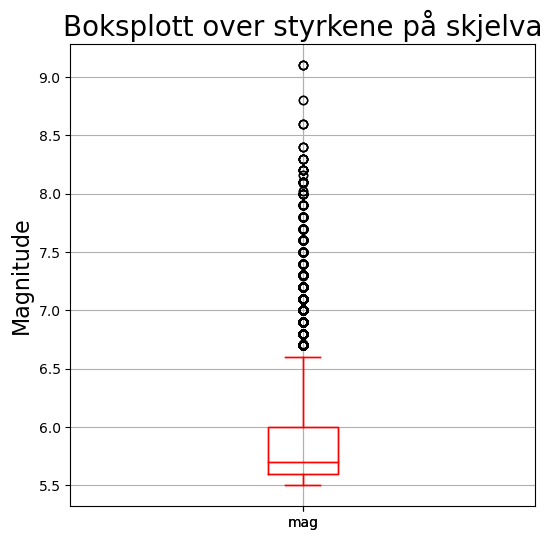

In [15]:
boksplot = skjelv.boxplot(column = "mag", figsize = (6,6), color = "red")
plt.title("Boksplott over styrkene på skjelva", fontsize = 20)
plt.ylabel("Magnitude", fontsize = 16)
plt.show()

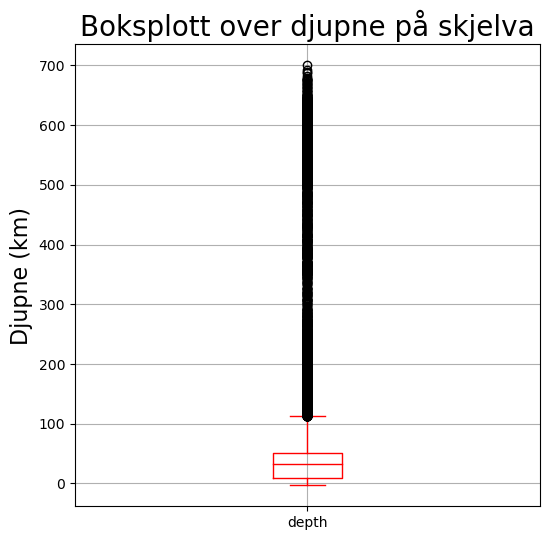

In [16]:
boksplot = skjelv.boxplot(column = "depth", figsize = (6,6), color = "red")
plt.title("Boksplott over djupne på skjelva", fontsize = 20)
plt.ylabel("Djupne (km)", fontsize = 16)
plt.show()

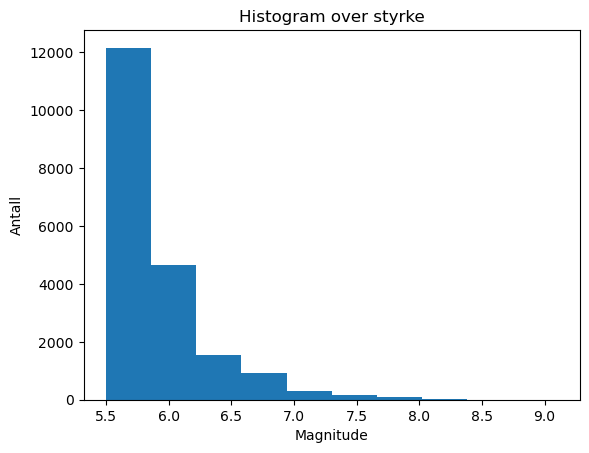

In [17]:
figur = plt.hist(skjelv["mag"])
plt.title("Histogram over styrke")
plt.xlabel("Magnitude")
plt.ylabel("Antall")
plt.show()

## GeoDataFrame

In [18]:
skjelv_gdf = gpd.GeoDataFrame(skjelv, 
                              geometry = gpd.points_from_xy(
                                  skjelv.longitude, 
                                  skjelv.latitude)
                             )
skjelv_gdf.head()

,time,latitude,longitude,depth,mag,geometry
0,2022-09-12T08:14:40.075Z,6.1766,127.5713,10.000,5.6,POINT (127.57130 6.17660)
1,2022-09-11T09:06:51.111Z,-20.9751,-178.9445,629.934,5.5,POINT (-178.94450 -20.97510)
2,2022-09-10T23:46:57.827Z,-6.2557,146.4692,90.013,7.6,POINT (146.46920 -6.25570)
3,2022-09-10T23:24:00.731Z,-1.2028,98.6188,10.000,5.7,POINT (98.61880 -1.20280)
4,2022-09-10T23:10:44.391Z,-1.1241,98.6239,20.000,6.0,POINT (98.62390 -1.12410)


## Plotting

In [27]:
skjelv_gdf["markør"] = skjelv_gdf["mag"] - 4.5
skjelv_gdf.head()

,time,latitude,longitude,depth,mag,geometry,markør
0,2022-09-12T08:14:40.075Z,6.1766,127.5713,10.000,5.6,POINT (127.57130 6.17660),1.1
1,2022-09-11T09:06:51.111Z,-20.9751,-178.9445,629.934,5.5,POINT (-178.94450 -20.97510),1.0
2,2022-09-10T23:46:57.827Z,-6.2557,146.4692,90.013,7.6,POINT (146.46920 -6.25570),3.1
3,2022-09-10T23:24:00.731Z,-1.2028,98.6188,10.000,5.7,POINT (98.61880 -1.20280),1.2
4,2022-09-10T23:10:44.391Z,-1.1241,98.6239,20.000,6.0,POINT (98.62390 -1.12410),1.5


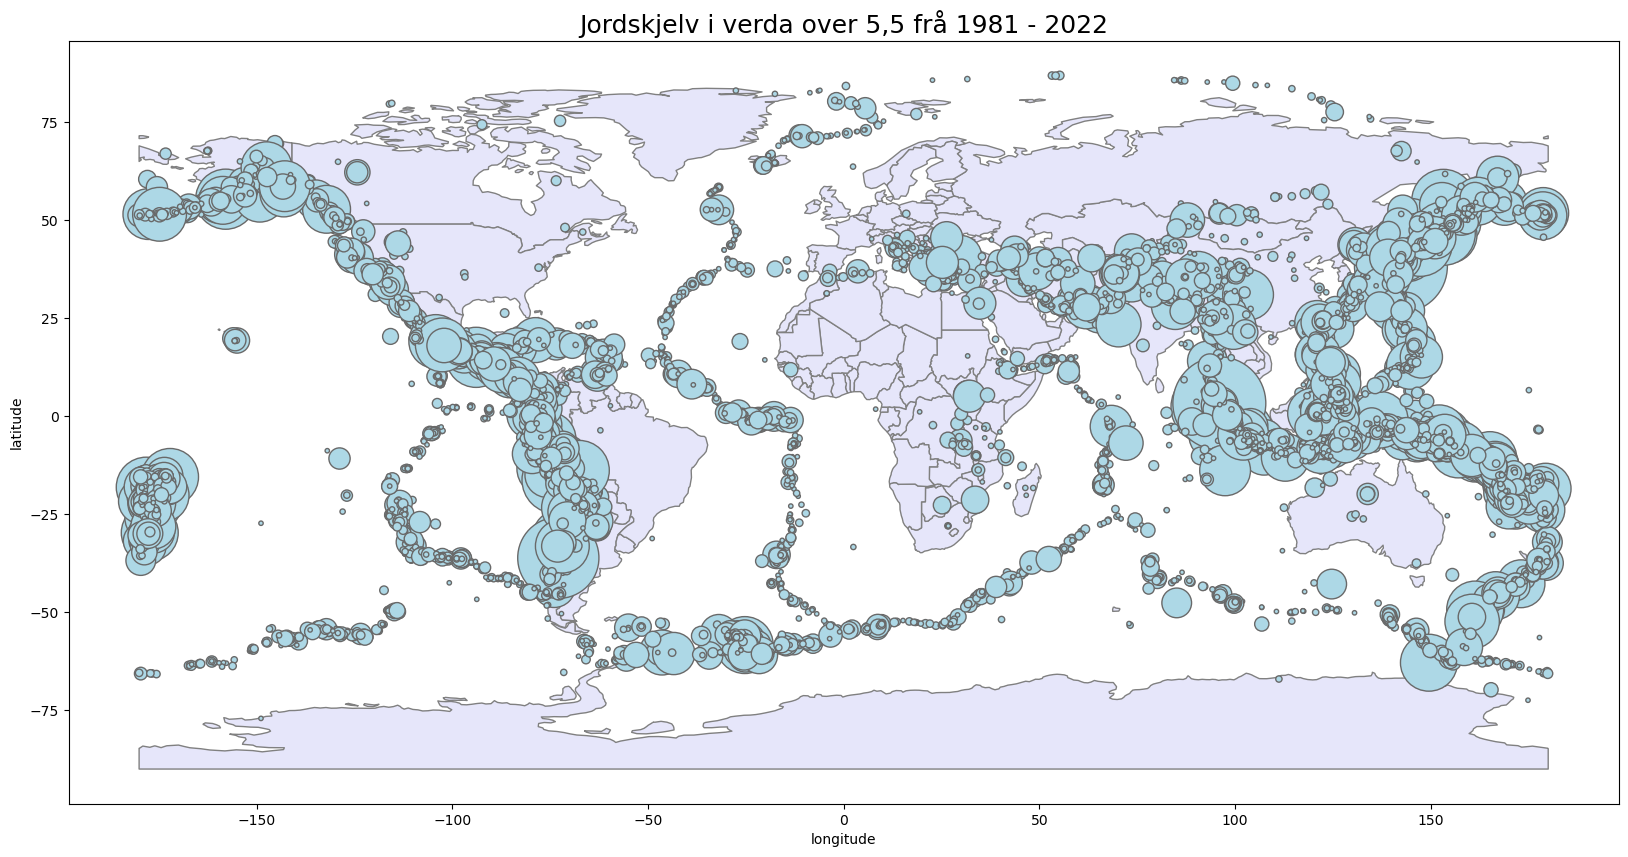

In [31]:
# bakgrunnskart
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

base = world.plot(color = "lavender", 
                  edgecolor = "gray", 
                  figsize = (20, 10)
                 )

skjelv_gdf.plot(ax = base, 
                kind = "scatter", 
                x = "longitude", 
                y = "latitude",
                marker = "o",
                color = "lightblue",
                s = 10*skjelv_gdf["markør"]**4,
                edgecolor = "dimgray"
               )

plt.title("Jordskjelv i verda over 5,5 frå 1981 - 2022", fontsize = 18)
plt.show()